In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Credit_card.csv")
data.head()

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data["Class"].unique()

array([0, 1], dtype=int64)

In [4]:
data.dtypes

Time        int64
v1        float64
v2        float64
v3        float64
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22       float64
v23       float64
v24       float64
v25       float64
v26       float64
v27       float64
v28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 31 columns):
Time      663 non-null int64
v1        663 non-null float64
v2        663 non-null float64
v3        663 non-null float64
v4        663 non-null float64
v5        663 non-null float64
v6        663 non-null float64
v7        663 non-null float64
v8        663 non-null float64
v9        663 non-null float64
v10       663 non-null float64
v11       663 non-null float64
v12       663 non-null float64
v13       663 non-null float64
v14       663 non-null float64
v15       663 non-null float64
v16       663 non-null float64
v17       663 non-null float64
v18       663 non-null float64
v19       663 non-null float64
v20       663 non-null float64
v21       663 non-null float64
v22       663 non-null float64
v23       663 non-null float64
v24       663 non-null float64
v25       663 non-null float64
v26       663 non-null float64
v27       663 non-null float64
v28       663 non-null float6

In [6]:
data.describe()


,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,240.723982,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,147.066052,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.000000,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,241.000000,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,366.000000,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [7]:
data.corr()

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
Time,1.000000,0.028683,0.009834,0.018602,-0.058763,-0.025315,-0.120970,-0.027581,-0.037070,-0.040928,...,0.013565,-0.039851,-0.012895,-0.037795,-0.036840,0.075932,0.036170,0.031980,-0.029162,0.162392
v1,0.028683,1.000000,-0.025170,-0.254344,0.157167,-0.199023,-0.071103,-0.251376,0.124846,-0.180942,...,-0.122996,-0.027771,-0.098697,0.026094,0.312445,-0.045045,-0.114709,0.156073,-0.264156,-0.028333
v2,0.009834,-0.025170,1.000000,0.034007,0.040368,0.111284,-0.075522,0.238931,-0.159036,0.030823,...,-0.009946,-0.101632,-0.007687,-0.051073,-0.151001,-0.042866,0.161803,-0.012906,-0.586181,-0.004125
v3,0.018602,-0.254344,0.034007,1.000000,0.025180,-0.140185,-0.210977,-0.021386,-0.092154,0.081086,...,0.022848,0.314449,0.140256,0.039368,-0.291937,0.107736,-0.122793,-0.143235,-0.260316,-0.054727
v4,-0.058763,0.157167,0.040368,0.025180,1.000000,-0.113285,0.048079,-0.004919,0.107325,-0.126200,...,0.004246,0.087268,-0.000647,0.007617,0.068311,-0.074023,0.129117,0.144743,0.121274,-0.040208
v5,-0.025315,-0.199023,0.111284,-0.140185,-0.113285,1.000000,0.217328,0.024702,0.071870,0.010342,...,-0.049581,-0.123879,0.059884,0.038532,-0.044227,-0.186063,-0.122389,-0.093077,-0.318843,0.009588
v6,-0.120970,-0.071103,-0.075522,-0.210977,0.048079,0.217328,1.000000,-0.064564,0.116199,0.002068,...,0.079927,-0.022090,-0.135339,-0.038680,0.035425,-0.016320,0.016720,-0.037252,0.265907,-0.012700
v7,-0.027581,-0.251376,0.238931,-0.021386,-0.004919,0.024702,-0.064564,1.000000,-0.068365,0.059744,...,-0.128528,-0.051285,-0.098963,0.005495,-0.269851,-0.019258,-0.123444,-0.359530,0.328842,-0.041347
v8,-0.037070,0.124846,-0.159036,-0.092154,0.107325,0.071870,0.116199,-0.068365,1.000000,-0.139339,...,-0.345152,0.199503,0.009226,-0.052302,-0.042189,-0.015120,0.205797,0.280824,-0.023216,-0.005878
v9,-0.040928,-0.180942,0.030823,0.081086,-0.126200,0.010342,0.002068,0.059744,-0.139339,1.000000,...,-0.022055,0.037252,-0.009483,-0.012012,0.109791,0.055806,0.029630,-0.278874,-0.024757,-0.025259


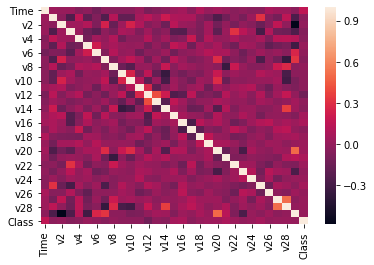

In [8]:
sns.heatmap(data.corr())

In [9]:
data.skew()

Time       0.083911
v1        -1.023190
v2        -2.598730
v3        -0.895776
v4        -0.277100
v5         0.612589
v6         1.577578
v7         0.349123
v8        -3.779956
v9         1.118661
v10        3.811942
v11        0.151029
v12       -0.484747
v13       -0.165198
v14       -2.643770
v15       -0.666142
v16       -0.676734
v17       -0.269912
v18        0.007315
v19       -0.005649
v20        4.524971
v21        3.162454
v22       -0.243161
v23       -0.178004
v24       -0.619881
v25       -0.403746
v26        0.903001
v27        0.483061
v28       -3.248704
Amount    10.771276
Class      4.758490
dtype: float64

In [10]:
data.shape

(663, 31)

In [11]:
data.isnull().sum()

Time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
Amount    0
Class     0
dtype: int64

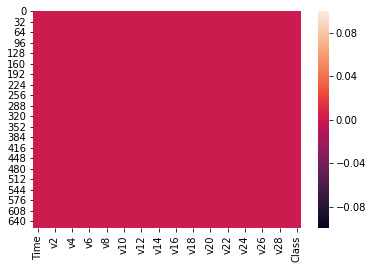

In [12]:
sns.heatmap(data.isnull())

In [34]:
x=data.drop("Class",axis=1)
x.head()

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [35]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x.astype(float))

In [36]:
y=data["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [37]:
print(x.shape)
print(y.shape)

(663, 30)
(663,)


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(523, 30)
(140, 30)
(523,)
(140,)


In [40]:
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9785714285714285
[[137   0]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



In [41]:
#Applying Bagging Methods
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfr=RandomForestClassifier(n_estimators=300)
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print(accuracy_score(y_test,predrfr))
print(confusion_matrix(y_test,predrfr))
print(classification_report(y_test,predrfr))

0.9785714285714285
[[137   0]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



In [43]:
#Apllying Boosting method
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print(accuracy_score(y_test,predgbr))
print(confusion_matrix(y_test,predgbr))
print(classification_report(y_test,predgbr))

0.9714285714285714
[[136   1]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.97       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.97      0.96       140



In [45]:
#Using xgboost 
import xgboost as xgb

In [46]:
xg_reg=xgb.XGBClassifier()
xg_reg.fit(x_train,y_train)
predxg=xg_reg.predict(x_test)
print(accuracy_score(y_test,predxg))
print(confusion_matrix(y_test,predxg))
print(classification_report(y_test,predxg))

0.9785714285714285
[[137   0]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



In [47]:
from sklearn.externals import joblib
joblib.dump(rfr,"credit_card_fraud")


['credit_card_fraud']